In [56]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [25]:
# loading training data
train = pd.read_csv('titanic-train.csv')
train.shape

(891, 11)

In [26]:
# loading testing data
test = pd.read_csv('titanic-test.csv')
test.shape

(418, 11)

In [27]:
# overview of the train dataset
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<AxesSubplot:>

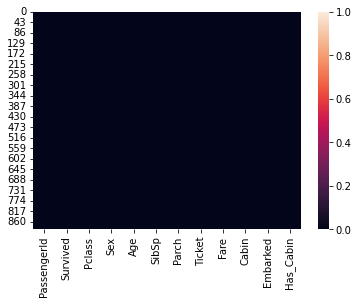

In [62]:
sns.heatmap(train.isnull()) # Age and Cabin has many null values

<AxesSubplot:>

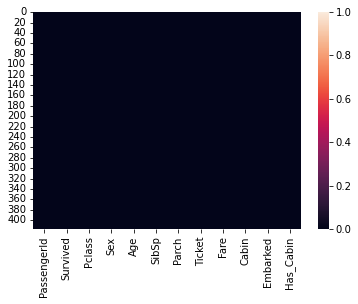

In [61]:
sns.heatmap(test.isnull()) # Age and Cabin has many null values

In [60]:
# converting cabin to binary attribute using dummy variable
train['Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [54]:
full_data = [train,test]

[     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
 0              1         0       3    male  22.0      1      0   
 1              2         1       1  female  38.0      1      0   
 2              3         1       3  female  26.0      0      0   
 3              4         1       1  female  35.0      1      0   
 4              5         0       3    male  35.0      0      0   
 ..           ...       ...     ...     ...   ...    ...    ...   
 886          887         0       2    male  27.0      0      0   
 887          888         1       1  female  19.0      0      0   
 888          889         0       3  female   NaN      1      2   
 889          890         1       1    male  26.0      0      0   
 890          891         0       3    male  32.0      0      0   
 
                Ticket     Fare Cabin Embarked  Has_Cabin  
 0           A/5 21171   7.2500   NaN        S          0  
 1            PC 17599  71.2833   C85        C          1  
 2    STON/O2.

In [57]:
# Remove all NULLS in the Age column
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    # Next line has been improved to avoid warning
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

In [10]:
X_train = titanic_df[['Sex','Pclass','Age']]
Y_train = titanic_df['Survived']

In [11]:
clf = DecisionTreeClassifier(X_train,Y_train)
y_pred = clf.predict(X_test)

TypeError: __init__() takes 1 positional argument but 3 were given